# Shark Attack Project

---

# Importing libraries

---

In [81]:
# Data wrangling and cleaning
import pandas as pd
import numpy as np
import re

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To handle species.txt file accessible through a url
import urllib

# To create "year", "month", and "day" columns
from datetime import datetime

# Setting preferences for pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

---

# Loading file into a DataFrame

---

In [82]:
with open("data/attacks.csv", "rb") as file:
    file_lines = file.readlines(500)
    for line in file_lines:
        print(line.decode('latin-1'))

Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex ,Age,Injury,Fatal (Y/N),Time,Species ,Investigator or Source,pdf,href formula,href,Case Number,Case Number,original order,,

2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303,,



In [83]:
shark = pd.read_csv("data/attacks.csv", sep=",", encoding="latin-1")

print(f"DataFrame shape = {shark.shape}\n")
print(f"{shark.info()}\n")

DataFrame shape = (25723, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species

In [84]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


---

# Standardizing column names

---

In [85]:
standardized_shark_cols = [col.strip().lower().replace(" ", "_") for col in shark.columns]
shark.columns = standardized_shark_cols

shark.head(2)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN


---

# Addressing null values

---

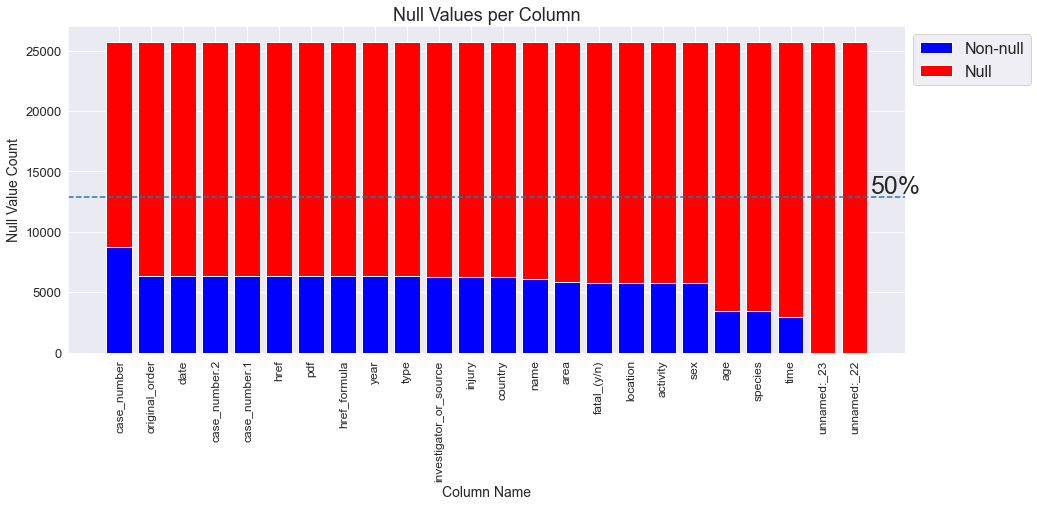

In [86]:
fig, ax = plt.subplots(figsize = (15, 6))

null_count_cols = shark.isna().sum().sort_values()

plt.bar(x=null_count_cols.index, height=shark.shape[0], color="blue", label="Non-null")
plt.bar(x=null_count_cols.index, height=null_count_cols, bottom=shark.shape[0]-null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(23.5, shark.shape[0]/2 + 300), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=90, fontsize=12)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

In [87]:
shark["null_count"] = shark.isna().sum(axis=1)
shark["null_count"].head(3)

0    2
1    3
2    3
Name: null_count, dtype: int64

In [88]:
shark.describe()

,year,original_order,null_count
count,6300.000000,6309.000000,25723.000000
mean,1927.272381,3155.999683,18.982078
std,281.116308,1821.396206,8.631545
min,0.000000,2.000000,2.000000
25%,1942.000000,1579.000000,23.000000
50%,1977.000000,3156.000000,24.000000
75%,2005.000000,4733.000000,24.000000
max,2018.000000,6310.000000,24.000000


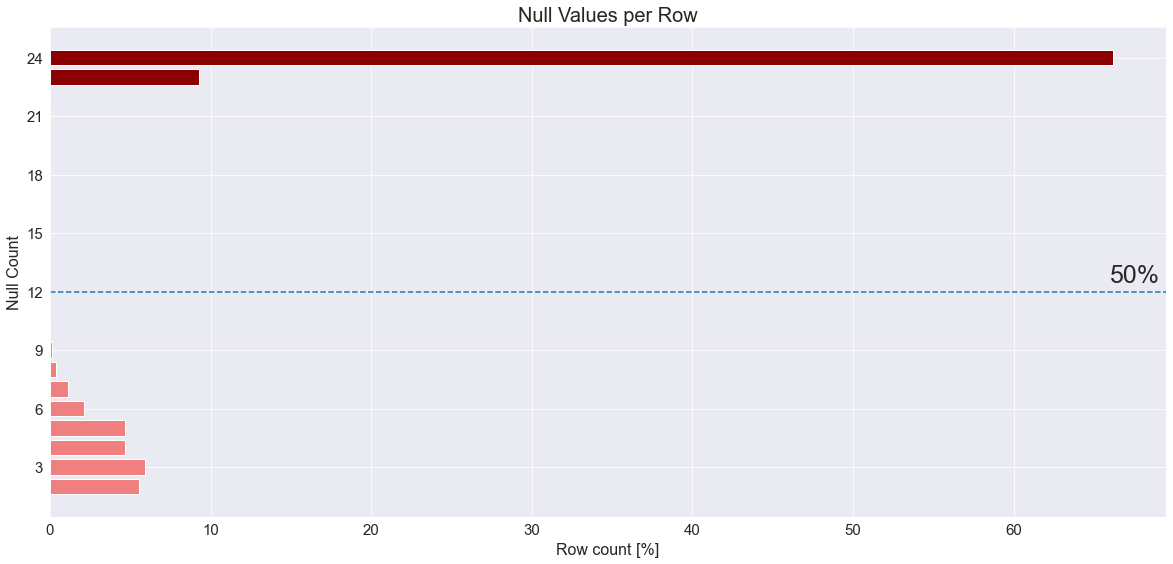

In [89]:
fig, ax = plt.subplots(figsize = (20, 9))

# Obtaining value_counts from shark DataFrame
null_percentages = shark["null_count"].value_counts(normalize=True) * 100

# Creating list comprehension for color scheme
color = ["darkred" if (nan_count >= 12) else "lightcoral" for nan_count in null_percentages.index]

plt.barh(y=null_percentages.index, width=null_percentages, color=color)

# Line-drawing and text annotation
plt.axhline(y=12, linestyle="--")
ax.annotate("50%", xy=(66, 12.5), fontsize=25)

# x-labels
ax.set_xlabel("Row count [%]", fontsize=16)
plt.xticks(fontsize=15)

# y-labels
ax.set_ylabel("Null Count", fontsize=16)
plt.yticks(ticks=[3, 6, 9, 12, 15, 18, 21, 24], fontsize=15)

# Title
ax.set_title("Null Values per Row", fontsize=20);

In [90]:
too_many_nan_mask = shark[shark["null_count"] >=20]
shark_clean = shark.drop(too_many_nan_mask.index, axis=0)

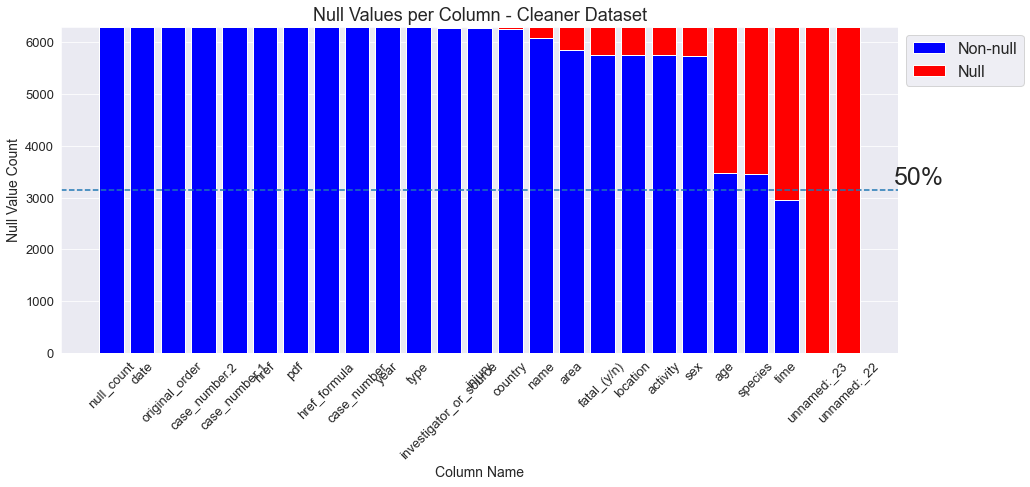

In [91]:
fig, ax = plt.subplots(figsize = (15, 6))

clean_null_count_cols = shark_clean.isnull().sum().sort_values()

plt.bar(x=clean_null_count_cols.index, height=shark_clean.shape[0], color="blue", label="Non-null")
plt.bar(x=clean_null_count_cols.index, height=clean_null_count_cols, bottom=shark_clean.shape[0]-clean_null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(25.5, shark_clean.shape[0]/2 + 100), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column - Cleaner Dataset", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

In [92]:
print(f"Number of unique values in column 'unnamed:_22': {shark_clean['unnamed:_22'].nunique()}")
print(list(shark_clean["unnamed:_22"].unique()))

Number of unique values in column 'unnamed:_22': 1
[nan, 'stopped here']


In [93]:
print(f"Number of unique values in column 'unnamed:_23': {shark_clean['unnamed:_23'].nunique()}")
print(list(shark_clean["unnamed:_23"].unique()))

Number of unique values in column 'unnamed:_23': 2
[nan, 'Teramo', 'change filename']


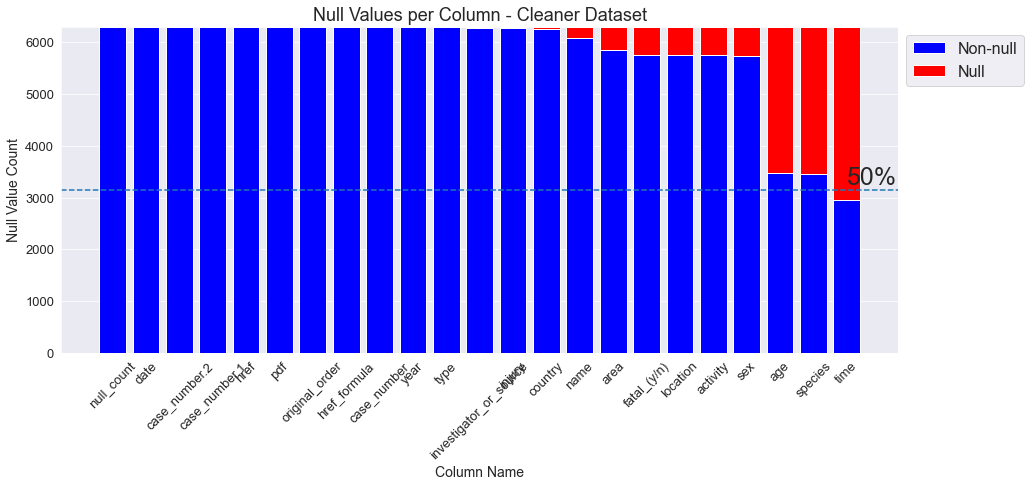

In [94]:
shark_clean = shark_clean.drop(columns=["unnamed:_22", "unnamed:_23"])

fig, ax = plt.subplots(figsize = (15, 6))

clean_null_count_cols = shark_clean.isnull().sum().sort_values()

plt.bar(x=clean_null_count_cols.index, height=shark_clean.shape[0], color="blue", label="Non-null")
plt.bar(x=clean_null_count_cols.index, height=clean_null_count_cols, bottom=shark_clean.shape[0]-clean_null_count_cols, color="red", label="Null")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0]/2, linestyle="--")
ax.annotate("50%", xy=(22, shark_clean.shape[0]/2 + 100), fontsize=25)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Null Value Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Null Values per Column - Cleaner Dataset", fontsize=18)
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1));

---

# Treating specific columns

---

## "case_number", "case_number.1" and "case_number.2" columns

In [95]:
# Are "case_number.1" and "case_number.2" exact copies of "case_number"?
case_number_eq_check = shark_clean[["case_number", "case_number.1", "case_number.2"]].apply(
    lambda row: all(row[col] == row["case_number"] for col in ["case_number.1", "case_number.2"]), axis=1
)
case_number_eq_check.head(3)

0    True
1    True
2    True
dtype: bool

In [96]:
print(f"'case_number', 'case_number.1' and 'case_number.2' diverge in {shark_clean.shape[0] - case_number_eq_check.sum()} rows")

shark_clean[case_number_eq_check == False][["case_number", "case_number.1", "case_number.2"]]

'case_number', 'case_number.1' and 'case_number.2' diverge in 24 rows


,case_number,case_number.1,case_number.2
34,2018.04.03,2018.04.02,2018.04.03
117,2017.07.20.a,2017/07.20.a,2017.07.20.a
144,2017.05.06,2017.06.06,2017.05.06
217,2016.09.15,2016.09.16,2016.09.15
314,2016.01.24.b,2015.01.24.b,2016.01.24.b
334,2015.12.23,2015.11.07,2015.12.23
339,2015.10.28.a,2015.10.28,2015.10.28.a
390,2015.07-10,2015.07.10,2015.07.10
560,2014.05.04,2013.05.04,2014.05.04
3522,1967.07.05,1967/07.05,1967.07.05


In [97]:
# For some reason, "case_number.1" and "case_number.2" are not exact copies of "case_number",
# diverging in 31 rows.
# I have decided to drop two of these columns, the criteria for this selection being the two columns
# with the highest number of null values.

shark_clean[["case_number", "case_number.1", "case_number.2"]].isna().sum()

case_number      1
case_number.1    0
case_number.2    0
dtype: int64

In [98]:
shark_clean = shark_clean.drop(columns=["case_number.1", "case_number.2"])

In [99]:
# Dropping the one null value in "case_number"

shark_clean = shark_clean.drop(index=shark_clean[shark_clean["case_number"].isna()].index)
shark_clean["case_number"].isna().sum()

0

---

## "age" column

In [156]:
mean_age = (
    shark_clean["age"]
    .dropna()
    .apply(lambda age: int(re.findall(r"[0-9]+", age)[0])
            if len(re.findall(r"[0-9]+", age)) > 0
            else 0
           )
    .astype(int)
    .mean()
)

mean_age = int(mean_age)
mean_age

27

In [159]:
shark_clean["clean_age"] = (
    shark_clean["age"]
    .fillna(str(mean_age))
    .apply(
        lambda age: int(re.findall(r"[0-9]+", age)[0])
        if len(re.findall(r"[0-9]+", age)) > 0
        else str(mean_age)
           )
    .astype(int)
)

shark_clean[["age", "clean_age"]].sample(5)

,age,clean_age
1244,29,29
2395,35,35
750,34,34
420,19,19
5366,19,19


---

## "sex" column

In [162]:
shark_clean["clean_sex"] = (
    shark_clean["sex"]
    .fillna("")
    .apply(
        lambda sex:
        sex.lower() if sex == "M"
        else sex.lower() if sex == "F"
        else "unknown"
           )
)

shark_clean["clean_sex"].value_counts(normalize=True)

m          0.808284
f          0.101095
unknown    0.090621
Name: clean_sex, dtype: float64

---

## "activity" column

In [179]:
shark_clean["activity"].sample(5)

1569               NaN
896       Surf fishing
5987    Fell overboard
943       Spearfishing
1434               NaN
Name: activity, dtype: object

In [188]:
activity_regex = r"swimming|div|fish|surf|bath|boat|wading|kayak|snorkel|sail|compet|boogie board"

shark_clean["clean_activity"] = shark_clean["activity"].fillna("").apply(
    lambda act:
    re.findall(activity_regex, act.lower())[0] if len(re.findall(activity_regex, act.lower())) > 0
    else "other"
)
shark_clean[["activity","clean_activity"]].sample(6)

,activity,clean_activity
1854,Swimming,swimming
5054,NaN,other
1242,Surf skiing,surf
3738,"Commercial fishing vessel, Ev-nn, struck objec...",fishing
2235,Boogie boarding,boogie board
1198,Fishing,fishing


In [190]:
# Rename values to improve readability

# Create dict with new names
act_name = {
    "div": "diving",
    "surf": "surfing",
    "fish": "fishing",
    "bath": "bathing",
    "kayak": "kayaking",
    "snorkel": "snorkeling",
    "sail": "sailing",
    "compet": "competing",
    "boogie board": "boogie boarding"
}

# Apply to "clean_activity" column
shark_clean["clean_activity"] = shark_clean["clean_activity"].apply(
    lambda act: act_name[act]
    if act in act_name.keys()
    else act
)

In [191]:
shark_clean["clean_activity"].value_counts(normalize=True)

other              0.259324
surfing            0.191239
swimming           0.174258
fishing            0.174258
diving             0.091573
bathing            0.030471
wading             0.026821
boat               0.016347
snorkeling         0.015077
kayaking           0.009046
boogie boarding    0.007777
sailing            0.002857
competing          0.000952
Name: clean_activity, dtype: float64

---

## "species" column

In [100]:
# Read the text file from the URL into a pandas DataFrame
url = 'https://scipython.com/static/media/problems/P4.2/shark-species.txt'
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()]
species_df = pd.DataFrame([line.strip().split(':') for line in lines], columns=['Species', 'Common Name'])

# Extract the common names and join them into a string separated by '|'
common_names = species_df['Common Name'].str.strip().str.lower()
common_names = common_names.fillna('')
species_string = '|'.join(common_names)

In [101]:
# Remove "shark" from each species.
species_string = re.sub(r" ?shark", "", species_string)

# Replace any instance of "[" and "]" for "", as it will mes with regex syntax.
species_string = re.sub(r"[\[\]]", "", species_string)

# Replace any " " with "" in an effort to match more species with the DataFrame's extremely unstructured "species" column
species_string = re.sub(" ", "", species_string)

# Replace any two or more "|" for only one "|" so as not to mess with regex syntax.
species_string = re.sub(r"\|+", "|", species_string)

# Remove the first "|" before any word for the same reason as above.
species_string = species_string[1:]

# Add "white" species to the string, as it isn't there for some reason.
species_string = species_string + "|white"

# Print the species string
print(species_string[:200])

blacknose|silvertip|bignose|graceful|greyreef|pigeye|borneo|copper|spinner|nervous|coates's|whitecheek|silky|creekwhaler|galapagos|pondicherry|human'swhaler|finetooth|smoothtoothblacktip|bull|blacktip


In [102]:
shark_clean["clean_species"] = shark_clean["species"].fillna("unknown").apply(
    lambda species: re.findall(species_string, species.replace(" ", "").lower())[0]
    if len(re.findall(species_string, species.replace(" ", "").lower())) > 0
    else "unknown"
)

shark_clean[["species", "clean_species"]].sample(5)

,species,clean_species
2295,NaN,unknown
3064,Blue shark,blue
2934,NaN,unknown
5315,NaN,unknown
1019,NaN,unknown


In [103]:
shark_clean["clean_species"].value_counts(normalize=True)

unknown                0.742581
white                  0.100936
tiger                  0.040311
bull                   0.028726
blacktip               0.015236
nurse                  0.014760
whale                  0.012062
blue                   0.008887
lemon                  0.005713
oceanicwhitetip        0.004126
spinner                0.003968
sandtiger              0.003174
greyreef               0.002698
caribbeanreef          0.002539
dusky                  0.002381
porbeagle              0.001270
galapagos              0.001111
basking                0.001111
angel                  0.000952
sandbar                0.000952
copper                 0.000794
shortfinmako           0.000635
silky                  0.000635
whitetipreef           0.000635
leopard                0.000476
tawnynurse             0.000476
salmon                 0.000476
goblin                 0.000317
broadnosesevengill     0.000317
cookiecutter           0.000317
silvertip              0.000317
portjack

---

## "injury" column

In [104]:
shark_clean["injury"].sample(4)

4966               Lacerations to legs from fins of shark
3666    3 m to 3.7 m [10' to 12']  great hammerhead sh...
5761                                          Foot bitten
982                      Bitten between left ankle & knee
Name: injury, dtype: object

In [105]:
injury_pattern = r"no injury|fatal|bit|lacerat|sever|abrasion|drown|bruise|puncture|minor"

shark_clean["clean_injury"] = shark_clean["injury"].fillna("").apply(
    lambda injury:
    re.findall(injury_pattern, injury.lower())[0] if len(re.findall(injury_pattern, injury.lower())) > 0
    else "unknown"
)
shark_clean[["injury","clean_injury"]].sample(6)

,injury,clean_injury
5085,"One was bitten on the leg, the other on the arm",bit
3586,"Left leg & lower right leg bitten, taken ashor...",bit
5097,FATAL,fatal
1004,"No injury, kayak bitten",no injury
2395,Left arm lacerated,lacerat
4920,"Thigh lacerated, abrasions",lacerat


In [106]:
# Rename values to improve readability

# Create dict with new names
injury_name = {
    "bit": "bite",
    "lacerat": "laceration",
    "minor": "minor injury",
    "sever": "severance",
    "drown": "drowning"
}

# Apply to "clean_injury" column
shark_clean["clean_injury"] = shark_clean["clean_injury"].apply(
    lambda injury: injury_name[injury]
    if injury in injury_name.keys()
    else injury
)

In [107]:
# Build value_counts() of "clean_injury" column
injury_value_counts = shark_clean["clean_injury"].value_counts(normalize=True)
injury_value_counts

fatal           0.211395
bite            0.206634
laceration      0.176321
unknown         0.133153
no injury       0.126964
severance       0.054595
minor injury    0.037137
puncture        0.026186
drowning        0.016029
abrasion        0.006031
bruise          0.005555
Name: clean_injury, dtype: float64

---

## "date" column

In [108]:
def standardize_date(date_str):
    m_dict = {
        "jan": "01",
        "feb": "02",
        "mar": "03",
        "apr": "04",
        "may": "05",
        "jun": "06",
        "jul": "07",
        "aug": "08",
        "sep": "09",
        "oct": "10",
        "nov": "11",
        "dec": "12"
    }

    pattern = r'(\d{2})\-([a-z]{3})\-(\d{4})'
    match = re.search(pattern, date_str.lower())

    if match:
        year = match.group(3)
        month = m_dict[match.group(2)] if match.group(2) in m_dict.keys() else "01"
        day = match.group(1) if int(match.group(1)) <= 31 else "01"
        return f"{year}-{month.zfill(2)}-{day.zfill(2)}"

    else:
        return None

def parse_date(date_str):
    standardized_date = standardize_date(date_str)

    if standardized_date:
        try:
            date = datetime.strptime(standardized_date, '%Y-%m-%d')
            year = date.year if date.year < 2023 else 1900
            month = date.month if 1 <= date.month <= 12 else 1
            day = date.day if 1 <= date.day <= 31 else 1
            return year, month, day

        except ValueError:
            pass

    return 1900, 1, 1

In [109]:
# create a new DataFrame with the extracted year, month, and day
shark_clean[["clean_year", "clean_month", "clean_day"]] = pd.DataFrame(shark_clean['date'].apply(parse_date).tolist(),
                        columns=['year', 'month', 'day'])

shark_clean[["date", "clean_year", "clean_month", "clean_day"]].sample(5)

,date,clean_year,clean_month,clean_day
3052,17-Nov-1980,1980.0,11.0,17.0
672,27-May-2013,2013.0,5.0,27.0
2601,24-Apr-1991,1991.0,4.0,24.0
3546,Early Nov-1966,1900.0,1.0,1.0
1964,08-Apr-2001,2001.0,4.0,8.0


In [117]:
shark_clean[["clean_year", "clean_month", "clean_day"]].fillna({"clean_day": "01", "clean_month": "01", "clean_year": "1900"}).isna().sum()

clean_year     0
clean_month    0
clean_day      0
dtype: int64

In [125]:
# Fill NaN values and cast column values as int
shark_clean[["clean_year", "clean_month", "clean_day"]] = (
    shark_clean[["clean_year", "clean_month", "clean_day"]]
    .fillna({"clean_day": "01", "clean_month": "01", "clean_year": "1900"})
    .astype(int)
)

In [126]:
# Create "clean_date" column of type timestamp.
shark_clean["clean_date"] = pd.to_datetime(
    arg=shark_clean[["clean_year", "clean_month", "clean_day"]]
    .rename(columns={"clean_day": "day", "clean_month": "month", "clean_year": "year"}),
    format="%Y-%m-%d",
    errors="ignore"
)

shark_clean[["clean_year", "clean_month", "clean_day", "clean_date"]].sample(5)

,clean_year,clean_month,clean_day,clean_date
2001,2000,10,6,2000-10-06 00:00:00
5377,1912,1,6,1912-01-06 00:00:00
5260,1900,1,1,1900-01-01 00:00:00
1231,2008,7,24,2008-07-24 00:00:00
3463,1968,8,8,1968-08-08 00:00:00


---

## "time" column

In [141]:
shark_clean["time"].dropna().sample(5)

3481    Night
4566    16h00
1513    16h45
1718    15h30
5445    11h00
Name: time, dtype: object

In [142]:
# Create regex to standardize "time" column to only contain 2 values: "a.m." and "p.m."

def standard_time(time_str):
    re_am_pm = r"a\.m\.|p\.m\."
    re_pm_words = r"evening|night|dusk|afternoon"
    re_am_words = r"morning|dawn"
    re_time = r"([0-9]{2})h([0-9]{2})"

    # Try first to find normal a.m. or p.m. match
    try1 = re.findall(re_am_pm, time_str)
    if try1:
        return try1[0]

    # If unsuccessful, move to p.m. words
    try2 = re.findall(re_pm_words, time_str)
    if try2:
        return "p.m."

    # If unsuccessful yet again, move to a.m. words
    try3 = re.findall(re_am_words, time_str)
    if try3:
        return "a.m."

    # If neither option is successful, move to time pattern
    try4 = re.search(re_time, time_str)
    if try4:
        hours = int(try4.group(1))
        if hours < 12:
            return "a.m."
        elif hours >=12:
            return "p.m."

    return "unknown"

In [143]:
# Apply standard_time function to "time" column to create "clean_time" column
shark_clean["clean_time"] = shark_clean["time"].fillna("").map(standard_time)
shark_clean[["time", "clean_time"]].sample(5)

,time,clean_time
5226,NaN,unknown
3346,NaN,unknown
75,12h30,p.m.
77,Morning,unknown
3722,12h00,p.m.


In [145]:
shark_clean["clean_time"].value_counts(normalize=True)

unknown    0.613236
p.m.       0.254721
a.m.       0.132043
Name: clean_time, dtype: float64

---

## Column Cardinality

In [ ]:
print(f"For comparison reasons, shark_clean shape is {shark_clean.shape}")
categorical_cardinality = shark_clean.select_dtypes(include="object").nunique().sort_values(ascending=False)
categorical_cardinality

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))

plt.bar(x=categorical_cardinality.index, height=categorical_cardinality, color="blue")

# Line-drawing and text annotation
plt.axhline(y=shark_clean.shape[0], linestyle="--")
ax.annotate("Total row count", xy=(15.8, shark_clean.shape[0] -400), fontsize=20)

# x-labels
ax.set_xlabel("Column Name", fontsize=14)
plt.xticks(rotation=45, fontsize=13)

# y-labels
ax.set_ylabel("Unique Values Count", fontsize=14)
plt.yticks(fontsize=13)

# Title and legend
ax.set_title("Unique Values - Categorical Columns", fontsize=18);

In [ ]:
# Drop high-cardinality categorical columns that won't be treated
# (except "case_number", which will act as primary key).
# shark_clean = shark_clean.drop(columns=["pdf", "href_formula", "href", "name", "original_order"])

---

## Anomalies in the data

---

## "Shark involvement not confirmed"

In [ ]:
involvement_unconfirmed = shark_clean["species"].fillna("unknown").map(lambda species: "Shark involvement" in species)
shark_clean[involvement_unconfirmed]